<a href="https://colab.research.google.com/github/JuliaVazTostes/escola-data-science/blob/master/EDS_Aula_001_S%C3%A9ries_Temporais_(Time_Series)_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# **Séries Temporais**

###1. Como importar Time Series em Python

In [0]:
# importar pacotes e setar configurações de plots
#  statsmodels é uma biblioteca de estatistica, uma das principais para se trabalhar com time series o '.tsa.seasonal' é uma função, nesse caso foi importado
#  apenas a função e não o pacote inteiro. seasonal_Decompose irá decompor o grafico
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()

%matplotlib inline

In [0]:
# url do dataset
dataset_path = "https://raw.githubusercontent.com/carlosfab/escola-data-science/master/datasets/electricity_consumption/Electric_Production.csv"

# importar o csv para um dataframe
df = pd.read_csv(dataset_path)

# ver as 5 primeiras entradas
df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [0]:
# Informações sobre a coluna DATE
df.DATE

0      01-01-1985
1      02-01-1985
2      03-01-1985
3      04-01-1985
4      05-01-1985
          ...    
392    09-01-2017
393    10-01-2017
394    11-01-2017
395    12-01-2017
396    01-01-2018
Name: DATE, Length: 397, dtype: object

In [0]:
# Ver a primeira linha
df.DATE[0]

'01-01-1985'

In [0]:
# Ver o formato da variável na coluna Data (o tipo é objeto -> String é do tipo objeto)
# Obs: só funciona com o colchete ao redor do 0, não funcionoiu com o parentese. (pq?)
# Para ser possível trabalhar com a data é necessário converter para datetime
type(df.DATE[0])

str

In [0]:
# [ANTES] converter tipo da coluna DATE em datetime
print("[ANTES]")
display(df.DATE.head())

[ANTES]


0    01-01-1985
1    02-01-1985
2    03-01-1985
3    04-01-1985
4    05-01-1985
Name: DATE, dtype: object

In [0]:
# [DEPOIS] converter tipo da coluna DATE em datetime
# O formato da data - %m representa o mês, #d representa o dia e o %Y MAIUSCULO representa o ano com quatro digitos (ano com dois dígitos é representado 
# pelo %y minusculo)
# nesse processo do formato voce esta falando o seguinte: Voce vai receber um dado em formato texto que esta organizado dois digitos par ao mes, traço, dois
# digitos pro dia, traço, quatro digitos pro ano
print("[DEPOIS]")
display(pd.to_datetime(df.DATE, format="%m-%d-%Y").head())

[DEPOIS]


0   1985-01-01
1   1985-02-01
2   1985-03-01
3   1985-04-01
4   1985-05-01
Name: DATE, dtype: datetime64[ns]

In [0]:
# Ainda não está salvo, foi so apresentado, é necessário converter DATE para datetime
# Uma prática muito legal é associar a data ao indice -> substituir o index pelo dataframe
df.index = pd.to_datetime(df.DATE, format="%m-%d-%Y")

# eliminar a coluna DATE por que ela já é o índice -> Não precisa de informação duplicada
# Como o inplace=True, como esta removendo nao é necessário colocar df=df.drop
# Para informar que eu quero eliminar coluna coloca-se axis=1, se fosse linha axis=0
df.drop("DATE", axis=1, inplace=True)

# ver as primeiras 5 entradas
# Agora temos apenas uma coluna, a de consumo, data agora é nosso índice
df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


###2. Visualizar Séries Temporais

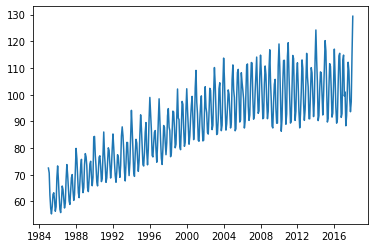

In [0]:
# plotar gráfico de consumo de eletricidade
# Nesse caso eu nao precisava informar qual é o x (df.index) e qual é o y(df.Value), por que eu so tenho uma coluna, então automaticamente o indice é o x
# coloca-se o ; depois dos codigos para não retornar mensagem de warning
plt.plot(df.index, df.Value);

###3. Como decompor uma Time Series em seus componentes

É possível decompor uma série temporal se você considerar a série como uma combinação aditiva ou multiplicativa dos seus componentes.

A biblioteca `stats`
from statsmodels.tsa.seasonal import seasonal_decompose


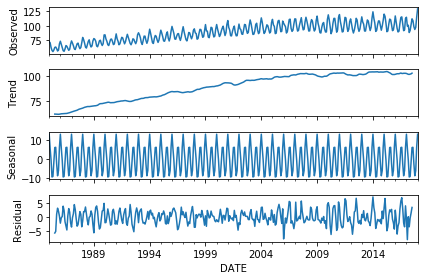

In [0]:
# salvar a decomposicao em result
# O unico valor obrigatorio nessa função é o x, mas como eu so tenho uma coluna eu posso importar o dataframe direto

result = seasonal_decompose(df)

# plotar a decomposicao
result.plot();


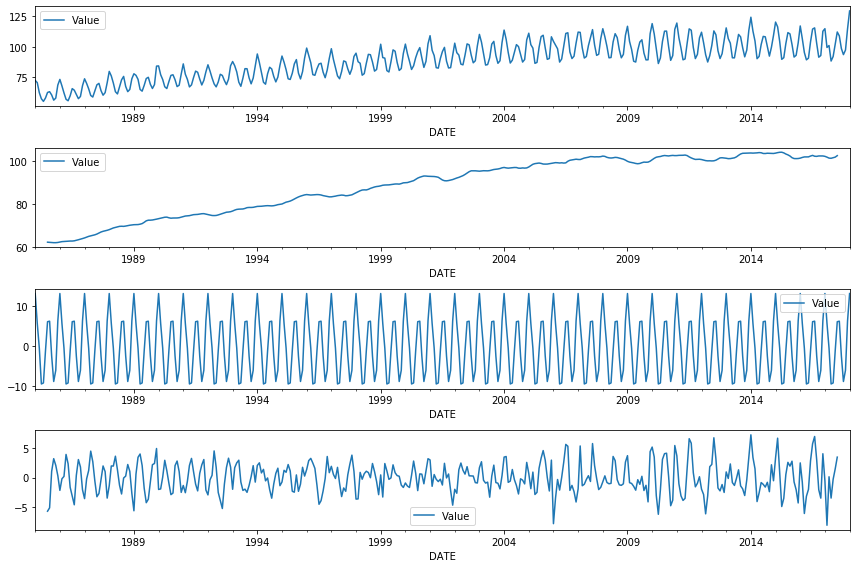

In [0]:
# plotar maior
fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(12,8))
result.observed.plot(ax=ax1)
result.trend.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4)
plt.tight_layout()

### 4. Análise Exploratória e Extração de Features

Usaremos um *dataset* contendo os dados de uma suposta companhia ferroviária que utiliza uma nova tecnologia de propulsão.

In [0]:
ferroviaria_dataset = "https://github.com/carlosfab/escola-data-science/raw/master/datasets/companhia_ferroviaria/trem.csv"

# importar os dados da empresa ferroviária
df_trem = pd.read_csv(ferroviaria_dataset)

# ver as 5 primeiras entradas
df_trem.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


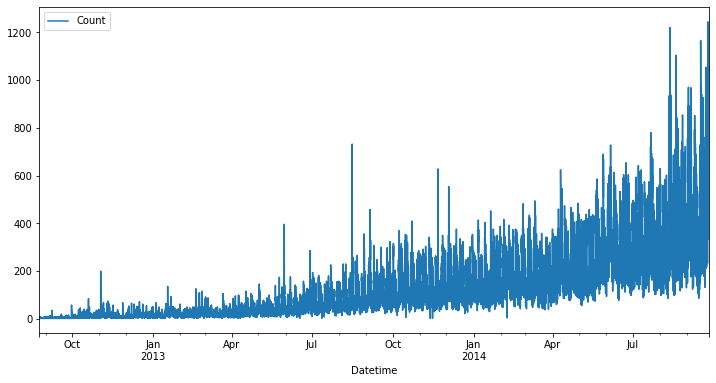

In [0]:
# converter a coluna Datetime em tipo datetime; 
# %H representa a hora, #M representa o minuto - tem que colocar, como no caso do hifen, o ':' por que é hora)
# df_trem.Datetime podem ser considerados df_trem['Datetime'] a mesma coisa se for uma palavra inteira, se tiver espaço ou hifen, f_trem.Datetime NÃO PODE SER
# USADO - tem que ser string normal com caracteres juntos
df_trem.Datetime = pd.to_datetime(df_trem.Datetime, format="%d-%m-%Y %H:%M")

# plotar gráfico
# Como nesse caso tem várias colunas, é obrigatório informar o que será x e o que será y
# A primeira parte desse codigo (fig, ax = plt.subplots(figsize=(12,6))) desenha o grafico, mas ele fica vazio, já a segunda, plota os valores no gráfico
fig, ax = plt.subplots(figsize=(12,6))
df_trem.plot(x='Datetime', y='Count', ax=ax);

**Hipóteses:**
* Pessoas viajam mais durante a semana.
* Há horários de pico por causa das indas e vindas do trabalho.
* Há períodos do mês onde a demanda por transporte é maior.

In [0]:
# criar features para cada período
df_trem['year'] = df_trem.Datetime.dt.year
df_trem['month'] = df_trem.Datetime.dt.month
df_trem['day'] = df_trem.Datetime.dt.day
df_trem['hour'] = df_trem.Datetime.dt.hour
df_trem['dayofweek'] = df_trem.Datetime.dt.dayofweek

In [0]:
# verificar as 5 primeiras entradas
df_trem.head()

,ID,Datetime,Count,year,month,day,hour,dayofweek
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5


* Pessoas viajam mais durante a semana

In [0]:
# converter as variáveis em 0 ou 1
# O pandas usa operador de bitwise, então  não posso utilizar o 'or', tenho que utilizar o '|'. Quando eu quiser o 'and' tenho que utilizar o '&'
df_trem['weekend'] = 0
df_trem.loc[(df_trem.dayofweek == 5) | (df_trem.dayofweek == 6), 'weekend'] = 1

In [0]:
# verificar os valores final de semana x semana
df_trem.weekend.value_counts()

0    13056
1     5232
Name: weekend, dtype: int64

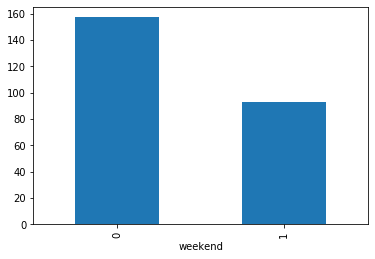

In [0]:
# plotar os valores final de semana x semana
df_trem.groupby('weekend').Count.mean().plot.bar();

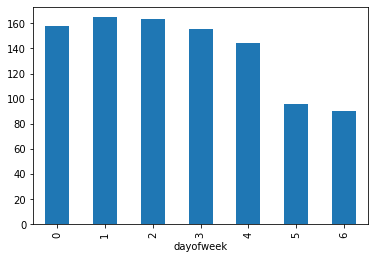

In [0]:
# plotar os valores por dia da semana
df_trem.groupby('dayofweek').Count.mean().plot.bar()

In [0]:
# criar features para dia da semana em formato texto - criação da coluna em branco
df_trem['diadasemana'] = ''
df_trem.head()

,ID,Datetime,Count,year,month,day,hour,dayofweek,weekend,diadasemana
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1,
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1,
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1,
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1,
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1,


In [0]:
# condicional relacionando numero ao dia da semana
# Só o 'df' resume o numero de linhas e colunas do dataset
df_trem.loc[(df_trem.dayofweek == 0), 'diadasemana']='0-segunda'
df_trem.loc[(df_trem.dayofweek == 1), 'diadasemana']='1-terca'
df_trem.loc[(df_trem.dayofweek == 2), 'diadasemana']='2-quarta'
df_trem.loc[(df_trem.dayofweek == 3), 'diadasemana']='3-quinta'
df_trem.loc[(df_trem.dayofweek == 4), 'diadasemana']='4-sexta'
df_trem.loc[(df_trem.dayofweek == 5), 'diadasemana']='5-sabado'
df_trem.loc[(df_trem.dayofweek == 6), 'diadasemana']='6-domingo'

df_trem.head()
df_trem

,ID,Datetime,Count,year,month,day,hour,dayofweek,weekend,diadasemana
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1,5-sabado
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1,5-sabado
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1,5-sabado
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1,5-sabado
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1,5-sabado
...,...,...,...,...,...,...,...,...,...,...
18283,18283,2014-09-25 19:00:00,868,2014,9,25,19,3,0,3-quinta
18284,18284,2014-09-25 20:00:00,732,2014,9,25,20,3,0,3-quinta
18285,18285,2014-09-25 21:00:00,702,2014,9,25,21,3,0,3-quinta
18286,18286,2014-09-25 22:00:00,580,2014,9,25,22,3,0,3-quinta


* Há horários de pico por causa das indas e vindas do trabalho.

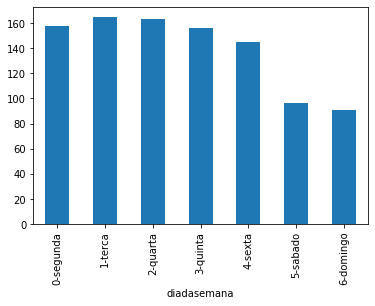

In [0]:
# plotar os valores por dia da semana
# Por não ser valor numerico, a sequencia das barras não seguiu os dias da semana corretamente
# Então eu coloquei o valor do dia na frente do texto
df_trem.groupby('diadasemana').Count.mean().plot.bar()

In [0]:
# verificar os valores dos dias da semana
# Reflete o numero de vezes que o dia da semana a pareceu, ou seja, o numero de linhas
df_trem.diadasemana.value_counts()

3-quinta     2616
1-terca      2616
6-domingo    2616
2-quarta     2616
5-sabado     2616
0-segunda    2616
4-sexta      2592
Name: diadasemana, dtype: int64

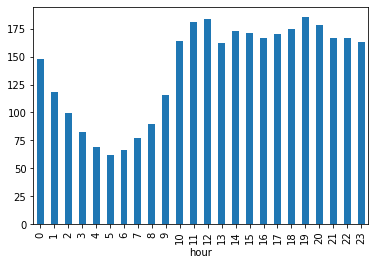

In [0]:
# plotar os valores em função do horário
df_trem.groupby('hour').Count.mean().plot.bar();

* Há períodos do ano onde a demanda por transporte é maior.

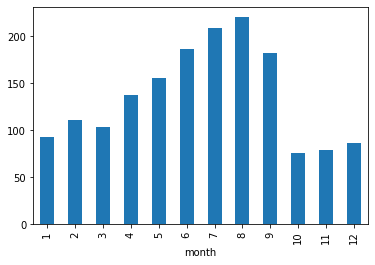

In [0]:
# plotar os valores em função dos meses
df_trem.groupby('month').Count.mean().plot.bar();